In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Piedmont wines dataset

The Piedmont wines dataset. We have 178 samples of red wine from the Piedmont region of Italy. The features measure chemical composition (like alcohol content) and visual properties like color intensity. The samples come from 3 distinct varieties of wine.

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.to_csv("Wine_data.csv", index = False)

In [3]:
X = df.drop(["class_label", "class_name"], axis=1)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = df["class_name"]
y.unique()

array(['Barolo', 'Grignolino', 'Barbera'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [7]:
from sklearn.cluster import KMeans

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


14918116.535045445
3917444.2178331288
1988050.9772157457
1162479.5664568627
817413.7094580885


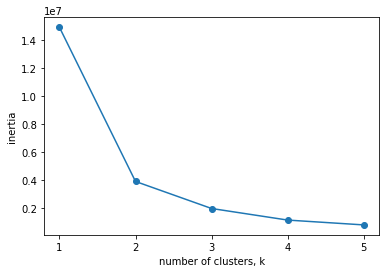

In [8]:
num_clusters = range(1, 6)
inertias = []
for k in num_clusters:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(X_train)
    print(model.inertia_)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_clusters)
plt.show()

We can observe from the inertia plot that 3 is a good number of clusters for the wine data. Now, we'll cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

In [9]:
new_model = KMeans(n_clusters=3)

In [10]:
labels = new_model.fit_predict(X_train)
labels

array([2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2])

In [11]:
# Create a DataFrame with labels and varieties as columns: df
new_df = pd.DataFrame({'labels': labels, 'varieties': y_train})
new_df

,labels,varieties
112,2,Grignolino
146,0,Barbera
91,0,Grignolino
151,0,Barbera
118,0,Grignolino
...,...,...
63,0,Grignolino
70,2,Grignolino
81,2,Grignolino
11,1,Barolo


In [12]:
# Create crosstab: ct
ct = pd.crosstab(new_df["labels"], new_df["varieties"])
ct

varieties,Barbera,Barolo,Grignolino
labels,,,
0,16,0,46
1,0,37,1
2,25,11,15


### Clusters vs. varieties

As we can see from the cross-tabulation, The KMeans clusters don't correspond well with the wine varieties.

The problem is that the features of the wine dataset have very different variances. The variance of a feature measures the spread of its values. For example, the malic acid feature has a higher variance than the od280 feature. The differences in some of the feature variances is enormous here

### StandardScaler

In KMeans clustering, the variance of a feature corresponds to its influence on the clustering algorithm. To give every feature a chance, the data needs to be transformed so that features have equal variance. This can be achieved with the StandardScaler from scikit-learn. It transforms every feature to have mean 0 and variance 1. The resulting "standardized" features can be very informative.

### Similar methods

The APIs of StandardScaler and KMeans are similar, but there is an important difference. StandardScaler transforms data, and so has a transform method. KMeans, in contrast, assigns cluster labels to samples, and this done using the predict method.

### Pipelines combine multiple steps

We need to perform two steps. Firstly, to standardize the data using StandardScaler, and secondly to take the standardized data and cluster it using KMeans. This can be conveniently achieved by combining the two steps using a scikit-learn pipeline. Data then flows from one step into the next, automatically.

The first steps are the same: creating a StandardScaler and a KMeans object. After that, import the make_pipeline function from sklearn.pipeline. Apply the make_pipeline function to the steps that you want to compose in this case, the scaler and the kmeans objects. Now use the fit method of the pipeline to fit both the scaler and kmeans, and use its predict method to obtain the cluster labels.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
new_model2 = KMeans(n_clusters=3)

In [16]:
from sklearn.pipeline import make_pipeline

In [17]:
pipeline = make_pipeline(scaler, new_model2)

In [18]:
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [19]:
pipeline.fit(X_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [20]:
labels2 = pipeline.predict(X_train)
labels2

array([2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 1,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0,
       0, 2, 2, 1, 0, 2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 0])

In [21]:
# Create a DataFrame with labels and varieties as columns: df
new_df2 = pd.DataFrame({'labels': labels2, 'varieties': y_train})
new_df2.head()

,labels,varieties
112,2,Grignolino
146,1,Barbera
91,2,Grignolino
151,1,Barbera
118,1,Grignolino


In [22]:
# Create crosstab: ct
ct2 = pd.crosstab(new_df2["labels"], new_df2["varieties"])
ct2 ## with standardization

varieties,Barbera,Barolo,Grignolino
labels,,,
0,0,48,3
1,41,0,2
2,0,0,57


In [23]:
ct ## without standardization

varieties,Barbera,Barolo,Grignolino
labels,,,
0,16,0,46
1,0,37,1
2,25,11,15


###  Feature standardization improves clustering

Checking the correspondence between the cluster labels and the wine varieties reveals that this new clustering, incorporating standardization, is fantastic. Its three clusters correspond almost exactly to the three wine varieties. This is a huge improvement on the clustering without standardization.